# APS1070
#### Project 1 --- Basic Principles and Models 
**Deadline: Oct 6th, 9PM - 10 percent**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: _Kecheng Xiao_  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: _1008709140_

##**Marking Scheme:**

This project is worth **10 percent** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).




### How to submit **(HTML + IPYNB)**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files on Quercus for grading.



Ref: https://stackoverflow.com/a/64487858 



# Project 1 [10 Marks] 
Let's apply the tools we have learned in the tutorial to a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

In [1]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
#dataset

In [2]:
import pandas as pd

# read data and set the column names with feature names
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
# add the target column
df['target'] = dataset.target
# show
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


## Part 1: Getting started [2 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[0.4]**
* How many features do we have in this dataset? _30_
* How many observations have a 'mean area' of greater than 700? _171_
* How many participants tested `Malignant`? _212_
* How many participants tested `Benign`? _357_

In [3]:
# Feature Count in Dataset
feature_count = df.count(axis='columns')[0] - 1 # excluding the 'target'
print('Feature Count:', feature_count)
# 'mean area' > 700
mean_area_ab700 = (df['mean area'] > 700).sum()
print("'mean area' > 700:", mean_area_ab700)
# tested Malignant
target_mal = df.groupby('target')['mean radius'].count()[0]
print('Malignant', target_mal)
# tested Benign
target_ben = df.groupby('target')['mean radius'].count()[1]
print('Benign', target_ben)

Feature Count: 30
'mean area' > 700: 171
Malignant 212
Benign 357


### Splitting the data
It is best practice to have a training set (from which there is a rotating validation subset) and a test set. Our aim here is to (eventually) obtain the best accuracy we can on the test set (we'll do all our tuning on the training/validation sets, however.) 

**Split the dataset** into a train and a test set **"70:30"**, use **``random_state=0``**. The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete. **[0.5]**

**Only Split the dataset once within you notebook.** You should not use the `train_test_split` function more than once, regardless of the random state. Keep this in mind for your future projects as well.

In [4]:
from sklearn.model_selection import train_test_split

# split the data to train:test, 7:3
train, test = train_test_split(df, test_size=0.3, random_state=0)
# take out the target
X_train, y_train = train.drop('target', axis=1), train['target']
X_test, y_test = test.drop('target', axis=1), test['target']

### Effect of Standardization (Visual)
Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the training set. Draw a plot where the x-axis is ``worst smoothness``, the y-axis is ``worst fractal dimension,`` and the color of each datapoint indicates its class.  **[0.5]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. Standardize the data and plot those features again. What's different? **why do they look similar?** Based on your observation, what is the advantage of standardization? **[0.6]**




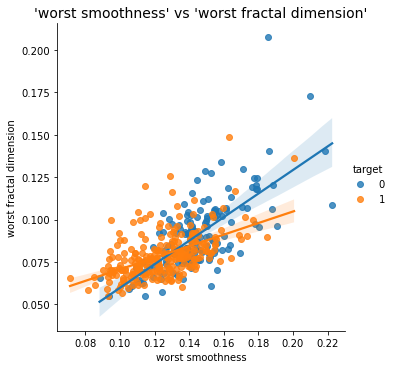

In [5]:
import seaborn
from matplotlib import pyplot as plt

# seaborn visualization
seaborn.lmplot(data = train, x='worst smoothness', y='worst fractal dimension', hue='target')
plt.title("'worst smoothness' vs 'worst fractal dimension'", fontsize = 14)
plt.show()

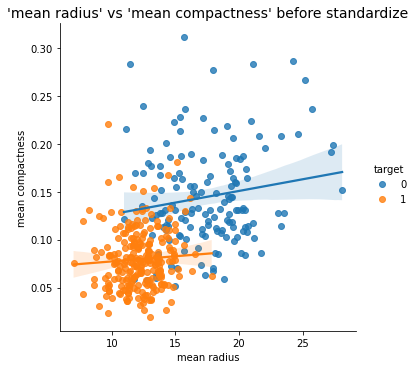

In [6]:
# before standardize
# plot
seaborn.lmplot(data = train, x = 'mean radius', y = 'mean compactness', hue='target')
plt.title("'mean radius' vs 'mean compactness' before standardize", fontsize = 14)
plt.show()

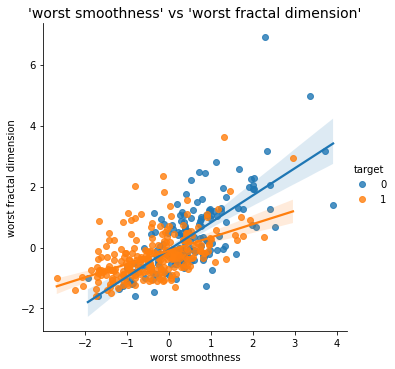

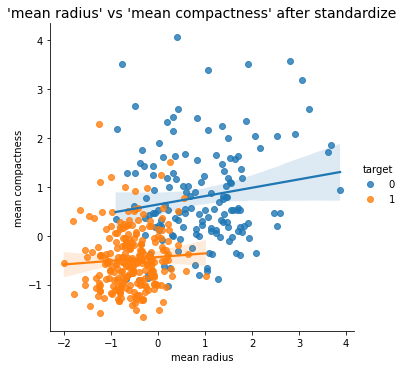

In [7]:
# standardized
standardized_train = (train-train.mean())/train.std()
# keep the 'target' still 0s and 1s
standardized_train['target'] = y_train
# seaborn visualization
seaborn.lmplot(data = standardized_train, x='worst smoothness', y='worst fractal dimension', hue='target')
plt.title("'worst smoothness' vs 'worst fractal dimension'", fontsize = 14)
plt.show()
# plot
seaborn.lmplot(data = standardized_train, x = 'mean radius', y = 'mean compactness', hue='target')
plt.title("'mean radius' vs 'mean compactness' after standardize", fontsize = 14)
plt.show()

### Answer:
1. The scales on x-axis and y-axis are different from original, used to be 0.00\~0.35 and 5\~30, and now are -2 to 4.
2. They look similar because standardization will not affect the overall distribution shape(the scale for every individual feature based on its original distribution). It will only make all the scales be unified.
3. The advantage of doing standardization is to reduce the bias caused by the original scale of data, since KNN is scale sensitive and all features are in the same scale after standardizing.

## Part 2: KNN Classifier without Standardization [2 Marks]
Normally, standardizing data is a key step in preparing data for a KNN classifier. However, for educational purposes, let's first try to build a model without standardization. Let's create a KNN classifier to predict whether a patient has a malignant or benign tumor. 

Follow these steps: 

1.   Train a KNN Classifier using cross-validation on the dataset. Sweep `k` (number of neighbours) from 1 to 100, and show a plot of the mean cross-validation accuracy vs `k`. **[1]**
2.   What is the best `k`? What is the highest cross-validation accu? **[0.5]**
3. Comment on  which ranges of `k` lead to under-fitted or over-fitted models (hint: compare training and validation curves!). **[0.5]**




In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from matplotlib import pyplot as plt

# create lists to store results
accu_list_train = []
accu_list_test = []
# loop for CV scores(train and test) with different k
for k in range(1, 101):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  scores = cross_validate(knn_model, X_train, y_train, cv=5, return_train_score=True)
  accu_list_train.append(scores['train_score'].mean())
  accu_list_test.append(scores['test_score'].mean())

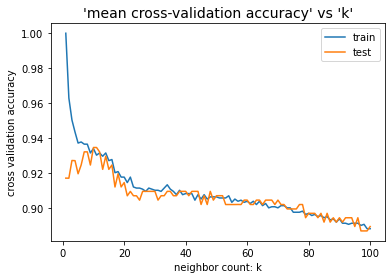

In [9]:
# plot
plt.plot(range(1, 101), accu_list_train, label = 'train')
plt.plot(range(1, 101), accu_list_test, label = 'test')
plt.xlabel('neighbor count: k')
plt.ylabel('cross validation accuracy')
plt.title("'mean cross-validation accuracy' vs 'k'", fontsize = 14)
plt.legend()
plt.show()

In [10]:
print('Highest CV scores:', max(accu_list_test), 'at k =', accu_list_test.index(max(accu_list_test)) + 1)

Highest CV scores: 0.9346518987341772 at k = 10


#### Answer:
1. The best k should be 10, because of the cross validation result is maximized at 93.47%.
2. The model is over-fitted at k=\[1,10) and is under-fitted at k=(20,100\], because before 10, the train curve is extremely high while the test result is not good enough. After 20, both training and testing drop slowly and show the loss of model complexity. In the range 10 to 20, the model performance is good and 10 is the best k regrading the CV result(testing) and 20 is the elbow point on training curve.

## Part 3: Feature Selection [3 Marks]
In this part, we aim to investigate the importance of each feature on the final classification accuracy. 
If we want to try every possible combination of features, we would have to test  $2^F$ different cases,  where F is the number of features, and in each case, we have to do a hyperparameter search (finding K, in KNN using cross-validation). That will take days!. 

To find more important features we will use a decision tree. based on a decision tree we can compute feature importance that is a metric for our feature selection (code is provided below).

You can use [this link](https://machinelearningmastery.com/calculate-feature-importance-with-python/
) to get familiar with extracting the feature importance order of machine learning algorithms in Python.

After we identified and removed the least important feature and evaluated a new KNN model on the new set of features, if the stop conditions (see step 7 below) are not met, we need to repeat the process and remove another feature.


Design a function ( `Feature_selector`) that accepts your dataset (X_train , y_train) and a threshold as inputs and: **[1]**
1. Fits a decision tree classifier on the training set.

2. Extracts the feature importance order of the decision tree model.

3. Removes the least important feature based on step 2. 
4. Then, a KNN model is trained on the remaining features. The number of neighbors (`k`) for each KNN model should be tuned using a 5-fold cross-validation.
5. Store the best `mean cross-validation` score and the corresponding `k` (number of neighbours) value in two lists.
6. Go back to step 3 and follow all the steps until you meet the stop condition (step 7). 
 
7. We will stop this process when (1) there is only one feature left, or (2) our cross-validation accuracy is dropped significantly compared to a model that uses all the features. In this function, we accept a threshold as an input argument. For example, if threshold=0.95 we do not continue removing features if our mean cross-validation accuracy after tuning `k` is bellow **0.95 $\times$ Full Feature cross-validation accuracy**.

8. Your function returns the list of removed features, and the corresponding mean cross-validation accuracy and `k` value when a feature was removed.

* Visualize your results by plotting the mean cross-validation accuracy (with a tuned `k` on y-axis) vs. the on the number of features (x-axis). This plot describes: what is the best cv score with 1 feature, 2 features, 3 features ... and all the features. **[0.5]**

* Plot the best value of `k` (y-axis) vs. the number of features. This plot explains the trend of number of neighbours with respect to the number of features.  **[0.5]**

* State what is the number of essential features for classification and justify your answer. **[1]**
  
  









You can use the following piece of code to start training a decision tree classifier and obtain its feature importance order. 
```
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train,y_train)
importance = dt.feature_importances_
```


In [11]:
def Feature_selector (x_train_mat, y_train_arr, tr=0.95):
  # Model Prepare
  # get the tree model
  from sklearn import tree
  dt = tree.DecisionTreeClassifier(random_state=7)
  # plug data into dataframe to have the corresponding feature name
  x_train_mat = pd.DataFrame(data=x_train_mat, columns=dataset.feature_names.tolist())
  # fit the model and gain the 'importance' with every feature
  dt.fit(x_train_mat, y_train_arr)
  # name and sort the feature weight column as 'score'
  importance = pd.DataFrame(data=dt.feature_importances_, index=dataset.feature_names, columns=['score'])
  importance = importance.sort_values(by='score', ascending=True)
  
  # Initialization
  # k range of KNN
  k_range = list(range(1,101))
  # store all k when getting the highest cv in that iteration, initialize with full model's best k=10
  best_knn_k = [10]
  # store all removed features, initialize with full model
  removed_feat = ['']
  # the cv_score with all features
  full_feat_cv_score = max([cross_validate(KNeighborsClassifier(n_neighbors=10), x_train_mat[importance.index],
                                           y_train_arr, cv=5, return_train_score=True)['test_score'].mean()])
  # initialize a list to store all knn scores, set the value first input as the best full KNN model
  best_knn_scores = [full_feat_cv_score]

  # Looping
  # keep going when there is a feature and model have good performance
  while len(importance) > 1 and best_knn_scores[-1] > tr*full_feat_cv_score:
    # extract the removed feature and use the rest
    removed_feat.append(importance.iloc[0].name)
    importance = importance.iloc[1:, :]
    # create list to store score for this feature set
    knn_nb_scores = []
    # for-loop for different k, append the average of CV scores in the test set
    for n in k_range:
      knn_model_ = KNeighborsClassifier(n_neighbors=n)
      scores_ = cross_validate(knn_model_, x_train_mat[importance.index], y_train_arr, cv=5, return_train_score=True)
      knn_nb_scores.append(scores_['test_score'].mean())
    # save the highest CV score and the best k for this feature set
    best_knn_scores.append(max(knn_nb_scores))
    best_knn_k.append(knn_nb_scores.index(max(knn_nb_scores)) + 1)

  # Create the output list, and reshape the list
  func = lambda a, b, c, p: (a[p], b[p], c[p])
  output = [func(removed_feat, best_knn_k, best_knn_scores, z) for z in range(len(removed_feat))]
  return output # keep feature in columns

In [12]:
# run with original train data
out = Feature_selector(X_train, y_train)
out

[('', 10, 0.9346518987341772),
 ('mean radius', 10, 0.9346518987341772),
 ('worst compactness', 10, 0.9346518987341772),
 ('worst smoothness', 10, 0.9346518987341772),
 ('worst area', 1, 0.922120253164557),
 ('symmetry error', 1, 0.922120253164557),
 ('concave points error', 1, 0.922120253164557),
 ('concavity error', 1, 0.922120253164557),
 ('compactness error', 1, 0.922120253164557),
 ('perimeter error', 1, 0.9195886075949368),
 ('texture error', 1, 0.9195886075949368),
 ('worst fractal dimension', 1, 0.9195886075949368),
 ('mean perimeter', 1, 0.919620253164557),
 ('mean area', 20, 0.9347468354430379),
 ('mean concave points', 20, 0.9347468354430379),
 ('mean concavity', 20, 0.9347468354430379),
 ('mean compactness', 20, 0.9347468354430379),
 ('mean smoothness', 20, 0.9347468354430379),
 ('smoothness error', 20, 0.9347468354430379),
 ('radius error', 20, 0.9347468354430379),
 ('fractal dimension error', 20, 0.9347468354430379),
 ('worst perimeter', 12, 0.9046835443037976),
 ('worst 

In [13]:
# convert to dataframe
out = pd.DataFrame(out, columns=['Removed Feature', 'KNN Neighbor Count', 'KNN Accuracy'])
out

,Removed Feature,KNN Neighbor Count,KNN Accuracy
0,,10,0.934652
1,mean radius,10,0.934652
2,worst compactness,10,0.934652
3,worst smoothness,10,0.934652
4,worst area,1,0.922120
5,symmetry error,1,0.922120
6,concave points error,1,0.922120
7,concavity error,1,0.922120
8,compactness error,1,0.922120
9,perimeter error,1,0.919589


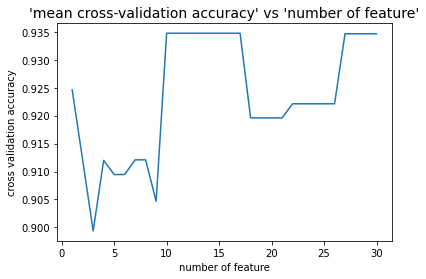

In [14]:
# visualize 'mean cross-validation accuracy' vs 'number of feature'
num_feat = list(range(30,0,-1))

plt.plot(num_feat, out['KNN Accuracy'])
plt.xlabel('number of feature')
plt.ylabel('cross validation accuracy')
plt.title("'mean cross-validation accuracy' vs 'number of feature'", fontsize = 14)
plt.show()

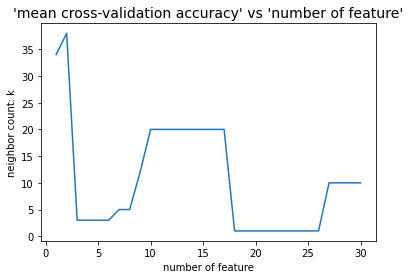

In [15]:
# visualize 'mean cross-validation accuracy' vs 'number of feature'
plt.plot(num_feat, out['KNN Neighbor Count'])
plt.xlabel('number of feature')
plt.ylabel('neighbor count: k')
plt.title("'mean cross-validation accuracy' vs 'number of feature'", fontsize = 14)
plt.show()

In [16]:
removed_importance_nsd = out['Removed Feature'].tolist()
selected_importance_nsd = list(set(dataset.feature_names.tolist()).symmetric_difference(set(removed_importance_nsd)))
selected_importance_nsd

['', 'worst concave points']

#### Answer:
The essential feature is 'worst concave points', so the number is 1. Since it is always the last feature that is kept by the feature selector and the accuracy still remains around 92%. And judging by the two plots above, we can also see, there is at least one feature remaining (both 'number of feature's are starting at 1).
However, considering the CV accuracy result, the number of essential features should be around 10 if we want to maintain the highest CV accuracy. 

## Part 4: Standardization [1 Marks]

Standardizing the data usually means scaling our data to have a mean of zero and a standard deviation of one. 

**Note:** When we standardize a dataset, do we care if the data points are in our training set or test set? Yes! The training set is available for us to train a model - we can use it however we want. The test set, however, represents a subset of data that is not available for us during training. For example, the test set can represent the data that someone who bought our model would use to see how the model performs (which they are not willing to share with us).
Therefore, we cannot compute the mean or standard deviation of the whole dataset to standardize it - we can only calculate the mean and standard deviation of the training set. However, when we sell a model to someone, we can say what our scalars (mean and standard deviation of our training set) was. They can scale their data (test set) with our training set's mean and standard deviation. Of course, there is no guarantee that the test set would have a mean of zero and a standard deviation of one, but it should work fine.

**To summarize: We fit the StandardScaler only on the training set. We transform both training and test sets with that scaler.**

1. Standardize the training  and test data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)) 

2. Call your ``Feature_selector`` function on the standardized training data with a threshold of 95\%. 
 * Plot the Cross validation accuracy when we have the standardized data (this part) and the original training data (last part) vs. the Number of features in a single plot (to compare them easily).

3. Discuss how standardization (helped/hurt) your model and its performance? Discuss which cases lead to a higher cross validation accuracy (how many features? which features? What K?)


In [17]:
# standardize the data
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train_sd, X_test_sd =  scale.fit_transform(X_train), scale.transform(X_test)
# see the feature selection for standardized train
out_sd = Feature_selector(X_train_sd, y_train)
out_sd

[('', 10, 0.9674367088607594),
 ('mean radius', 8, 0.9649683544303798),
 ('worst compactness', 8, 0.9699683544303797),
 ('worst smoothness', 12, 0.9674683544303797),
 ('worst area', 12, 0.9649367088607596),
 ('symmetry error', 5, 0.9649050632911391),
 ('concave points error', 12, 0.9649367088607596),
 ('concavity error', 5, 0.9674050632911392),
 ('compactness error', 5, 0.9699367088607594),
 ('perimeter error', 5, 0.9674050632911392),
 ('texture error', 5, 0.9674367088607594),
 ('worst fractal dimension', 6, 0.9674367088607594),
 ('mean perimeter', 12, 0.9649367088607594),
 ('mean area', 16, 0.9649683544303798),
 ('mean concave points', 5, 0.9674050632911392),
 ('mean concavity', 5, 0.9674050632911392),
 ('mean compactness', 5, 0.9674367088607594),
 ('mean smoothness', 16, 0.9674367088607594),
 ('smoothness error', 20, 0.9724367088607595),
 ('radius error', 16, 0.9699683544303797),
 ('fractal dimension error', 18, 0.9699050632911392),
 ('worst perimeter', 6, 0.9649050632911391),
 ('wor

In [18]:
# convert to dataframe
out_sd = pd.DataFrame(out_sd, columns=['Removed Feature', 'KNN Neighbor Count', 'KNN Accuracy'])
out_sd

,Removed Feature,KNN Neighbor Count,KNN Accuracy
0,,10,0.967437
1,mean radius,8,0.964968
2,worst compactness,8,0.969968
3,worst smoothness,12,0.967468
4,worst area,12,0.964937
5,symmetry error,5,0.964905
6,concave points error,12,0.964937
7,concavity error,5,0.967405
8,compactness error,5,0.969937
9,perimeter error,5,0.967405


In [19]:
out_sd.loc[out_sd['KNN Accuracy'].idxmax()]

Removed Feature       smoothness error
KNN Neighbor Count                  20
KNN Accuracy                  0.972437
Name: 18, dtype: object

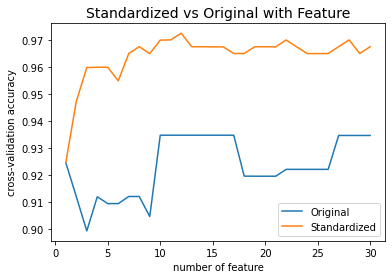

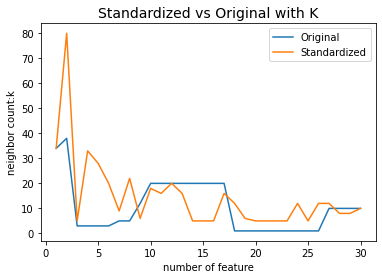

In [20]:
# plot and compare
from  matplotlib import pyplot as plt

plt.plot(num_feat, out['KNN Accuracy'], label = 'Original')
plt.plot(num_feat, out_sd['KNN Accuracy'], label = 'Standardized')
plt.ylabel('cross-validation accuracy')
plt.xlabel('number of feature')
plt.title("Standardized vs Original with Feature", fontsize = 14)
plt.legend()
plt.show()

plt.plot(num_feat, out['KNN Neighbor Count'], label = 'Original')
plt.plot(num_feat, out_sd['KNN Neighbor Count'], label = 'Standardized')
plt.ylabel('neighbor count:k')
plt.xlabel('number of feature')
plt.title("Standardized vs Original with K", fontsize = 14)
plt.legend()
plt.show()

#### Answer:
- The standardization process definitely helps the model performance by raising up the CV accuracy significantly. By observing the curve difference, we can easily see the standardized accuracies are round 97% and the non-standardized are only 93%. Also the standardized model can gain performance significantly better than the non-standardized at first 10 features.
- The max model performance regarding CV accuracy is showed at the second last code cell above. The CV accuracy is close to 97.2% when k=20. 


## Part 5: Decision Tree Classifier [1.5 Mark]

Train a decision tree classifier on the standardized dataset (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) and check the example there.) Tune the `max_depth` and `min_samples_split` parameters of the tree using cross-validation (CV).
 * Compare the decision tree's performance (mean CV score) with KNN, both using all the features. 


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from matplotlib import pyplot as plt

In [22]:
# create lists to store results of all min_samples_split and max_depth
accu_min_split_max_depth = []
# double loop for CV scores with different combination
for k in range(2, 21):
  for j in range(1, 21):
    tree_model = DecisionTreeClassifier(min_samples_split=k, max_depth=j, random_state=7)
    scores = cross_validate(tree_model, X_train_sd, y_train, cv=5, return_train_score=True)
    accu_min_split_max_depth.append((k, j, scores['test_score'].mean()))

In [23]:
import numpy as np

# calculate the max result of CV
max_pos = 0
max_cv = -np.inf
for i in range(len(accu_min_split_max_depth)):
  if accu_min_split_max_depth[i][2] > max_cv:
    max_cv = accu_min_split_max_depth[i][2]
    max_pos = i
accu_min_split_max_depth[max_pos]

(2, 3, 0.9271518987341771)

In [24]:
 # best tree and KNN models with all features
bdt = DecisionTreeClassifier(min_samples_split=accu_min_split_max_depth[max_pos][0],
                             max_depth=accu_min_split_max_depth[max_pos][1])
bknn = KNeighborsClassifier(n_neighbors=10)
# get cv scores
bdt_scores = cross_validate(bdt, X_train_sd, y_train, cv=5, return_train_score=True)['test_score'].mean()
bknn_scores = cross_validate(bknn, X_train_sd, y_train, cv=5, return_train_score=True)['test_score'].mean()
# show the result
print('Tree model CV score:', bdt_scores)
print('KNN model CV score:', bknn_scores)

Tree model CV score: 0.9220886075949366
KNN model CV score: 0.9674367088607594


## Part 6: Test Data [0.5 Mark]

Now that you've created several models, pick your best one (the highest CV accuracy) and apply it to the test dataset you had initially set aside. Discuss your results.

In [25]:
# the best is feature selected KNN model
best_model_knn = KNeighborsClassifier(n_neighbors = out_sd.loc[out_sd['KNN Accuracy'].idxmax()][1])
X_train_sd = pd.DataFrame(X_train_sd, columns=dataset.feature_names.tolist())
X_test_sd = pd.DataFrame(X_test_sd, columns=dataset.feature_names.tolist())

# use selected features
removed_importance = [out_sd['Removed Feature'][:out_sd['KNN Accuracy'].idxmax()+1]][0][1:].tolist()
selected_importance = list(set(dataset.feature_names.tolist()).symmetric_difference(set(removed_importance)))
best_model_knn.fit(X_train_sd[selected_importance], y_train)

KNeighborsClassifier(n_neighbors=20)

Best Model


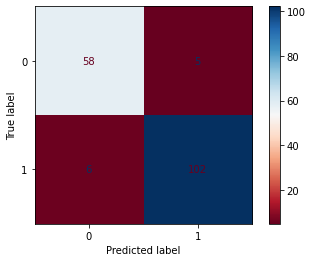

Precision: 0.953
Recall: 0.944
F1: 0.949
Accuracy: 0.936


In [26]:
from sklearn.metrics import *

# predict and compare the results between Tree and KNN
y_predict_knn = best_model_knn.predict(X_test_sd[selected_importance])

# plot KNN
print('Best Model')
cm_knn = confusion_matrix(y_test, y_predict_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn)
disp_knn.plot(cmap='RdBu')
plt.show()
print('Precision: %.3f' % precision_score(y_test, y_predict_knn))
print('Recall: %.3f' % recall_score(y_test, y_predict_knn))
print('F1: %.3f' % f1_score(y_test, y_predict_knn))
print('Accuracy: %.3f' % accuracy_score(y_test, y_predict_knn))

#### Answer:
The overall model performance is good with all metrics, the testing set accuracy is close to the training performance(around 95%depends on the random number).

References:

https://towardsdatascience.com/decision-trees-in-machine-learning-641b9c4e8052

https://www.analyticsvidhya.com/blog/2021/02/machine-learning-101-decision-tree-algorithm-for-classification/